# Project: Wrangling and Analyze Data

In [4]:
import pandas as pd
import numpy as np
import requests as requests
import json
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [5]:
tweet_archive_pd=pd.read_csv("twitter-archive-enhanced.csv")


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [6]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response=requests.get(url)
with open('image-predictions.tsv',mode='wb') as file:
    file.write(response.content)
image_prediction_df=pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
data = [json.loads(line) for line in open('tweet-json.txt','r')]
tweet_json_pd=pd.DataFrame(data)
# the needed field are id,retweet_count,favorite 
tweet_json_pd=tweet_json_pd[['id','retweet_count','favorite_count']]

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### .Virtual Assesments

In [68]:
# tweet_archive_pd
tweet_archive_pd.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
33,885984800019947520,NaN,NaN,2017-07-14 22:10:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion advised. This is Jimbo. He w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885984800...,12,10,Jimbo,None,None,None,None
1782,677687604918272002,NaN,NaN,2015-12-18 03:11:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This was Cindy's face when she heard Susan for...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677687604...,11,10,None,None,None,None,None
241,846505985330044928,NaN,NaN,2017-03-27 23:35:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",THIS WAS NOT HIS FAULT HE HAD NO IDEA. 11/10 S...,NaN,NaN,NaN,https://twitter.com/shomaristone/status/846484...,11,10,None,None,None,None,None
1991,672622327801233409,NaN,NaN,2015-12-04 03:43:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This lil pupper is sad because we haven't foun...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672622327...,12,10,None,None,None,pupper,None


In [67]:
#image_prediction_df
image_prediction_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
456,674774481756377088,https://pbs.twimg.com/media/CV1HztsWoAAuZwo.jpg,1,Chihuahua,0.407016,True,French_bulldog,0.309978,True,Siamese_cat,0.227677,False
1140,729823566028484608,https://pbs.twimg.com/media/CiDap8fWEAAC4iW.jpg,1,kelpie,0.218408,True,Arabian_camel,0.114368,False,coyote,0.096409,False
1880,846874817362120707,https://pbs.twimg.com/media/C8C0JYHW0AAy-7u.jpg,2,Shetland_sheepdog,0.450539,True,papillon,0.187928,True,collie,0.140068,True
637,681261549936340994,https://pbs.twimg.com/media/CXRTw_5WMAAUDVp.jpg,1,Tibetan_terrier,0.382101,True,miniature_poodle,0.095429,True,Maltese_dog,0.065738,True
725,686050296934563840,https://pbs.twimg.com/media/CYVXBb9WsAAwL3p.jpg,1,Pomeranian,0.985789,True,keeshond,0.004083,True,Pekinese,0.003334,True


In [66]:
# tweet_json_pd
tweet_json_pd.sample(3)

,id,retweet_count,favorite_count
563,802323869084381190,6808,18124
1564,687841446767013888,2872,6009
527,808501579447930884,3007,12595


### .Programmatic Assessments

In [11]:
# tweet_archive_pd
tweet_archive_pd.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [12]:
# check for duplicate in tweet_archive_pd
tweet_archive_pd.duplicated().sum()

0

In [13]:
# check for null in tweet_archive_pd
tweet_archive_pd.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [14]:
tweet_archive_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [69]:
tweet_archive_pd.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
# image_prediction_df
image_prediction_df.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [65]:
# check for duplicate in image_prediction_df
image_prediction_df.duplicated().sum()

0

In [17]:
image_prediction_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [18]:
image_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [70]:
image_prediction_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [19]:
tweet_json_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [20]:
tweet_json_pd.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [21]:
tweet_json_pd.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

### Quality issues
1.tweet_archive-in_reply_to_user_id and in_reply_to_status_id are float datatype

2.tweet_Json-has column as id instead of tweet_id

3.tweet_id(tweet_archive_pd,image_prediction_df,tweet_json_pd) are integer datatype

4.tweet_archive- No actual rating value column

5.tweet_archive- contains retweeted tweets

6.tweet_archive- name contains invalid names.

7.tweet_archive-timestamp is an object datatype and contains more that one variable


8.source is a url

### Tidiness issues
1. the dogs stage are in saperate columns 

2.drops columns not necessarly needed

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [22]:
# Make copies of original pieces of data
tweet_archive_clean=tweet_archive_pd.copy()
image_prediction_clean=image_prediction_df.copy()
tweet_json_clean=tweet_json_pd.copy()

### QUALITY ISSUES

### Issue 1:tweet_archive-in_reply_to_user_id and in_reply_to_status_id are float datatype

#### Define:
tweet_archive-in_reply_to_user_id and in_reply_to_status_id to string

#### Code

In [23]:
tweet_archive_clean['in_reply_to_status_id']=tweet_archive_clean['in_reply_to_status_id'].astype(str)
tweet_archive_clean['in_reply_to_user_id']=tweet_archive_clean['in_reply_to_user_id'].astype(str)


#### Test

In [24]:
tweet_archive_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Issue #2:tweet_Json-has has column as  id instead of tweet_id

#### Define
rename the id to tweet_id,this is to enable join easier  

#### Code

In [25]:
tweet_json_clean.rename(columns={'id':'tweet_id'},inplace=True)


#### Test

In [26]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### Issue #3:tweet_id(tweet_archive_pd,image_prediction_df,tweet_json_pd) are integer datatype

#### Define
convert tweet_archive_pd['tweet_id'],image_prediction_df['tweet_id'],tweet_json_pd['tweet_id'] to string

#### Code

In [27]:
tweet_archive_clean['tweet_id']=tweet_archive_clean['tweet_id'].astype(str)
tweet_json_clean['tweet_id']=tweet_json_clean['tweet_id'].astype(str)
image_prediction_clean['tweet_id']=image_prediction_clean['tweet_id'].astype(str)


#### Test

In [28]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(2), int64(2),

In [29]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [30]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #4:tweet_archive- No actual rating value column

#### Define
create a new column in tweet_archive with the value of rating_numerator/rating_denominator as it content

#### Code

In [31]:
tweet_archive_clean['user_rating']=tweet_archive_clean['rating_numerator']/tweet_archive_clean['rating_numerator']

#### Test

In [32]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
user_rating                  

### Issue #5:tweet_archive- contains retweeted tweets

#### Define
rows that contains retweeted tweets will be drop-this is because we are intrested in tweets only,

code

In [34]:
#select rows with no retweet
tweet_archive_clean=tweet_archive_clean[tweet_archive_clean.retweeted_status_id.isna()]

### Test

In [35]:
tweet_archive_clean.shape

(2175, 18)

### Issue #6:tweet_archive- name contains unusual names

#### Define
the unusual names are in lowcase,therefore i will get all names in lowercase and replace them with 'none' as value

### Code

In [36]:
wrong_name=tweet_archive_clean[tweet_archive_clean['name'].str.islower()==True]['name'].unique()
wrong_name


array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'an', 'actually', 'just', 'getting', 'mad', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [37]:
# # #  to replace the wrong names with none
for val in wrong_name:
    tweet_archive_clean.name.replace(val,'None',inplace=True)


### Test

In [38]:
wrong_name=tweet_archive_clean[tweet_archive_clean['name'].str.islower()==True]['name'].unique()
# tweet_archive_copy[condit].
wrong_name

array([], dtype=object)

### Issue #7:tweet_archive-timestamp is an object datatype and contains more that one variable

#### Define
Two actions is needed here
i.(tweet_archive-timestamp is an object datatype):convert the timestamp to datetime
ii.(contains more that one variable): extract year and date from the timestamp

### Code

In [39]:
# convert the timestamp to datetime
tweet_archive_clean['timestamp']=tweet_archive_clean['timestamp'].apply(pd.to_datetime)

In [40]:
# extract date,year of tweet from timestamp
tweet_archive_clean['tweet_year']=pd.to_datetime(tweet_archive_clean['timestamp']).dt.year
tweet_archive_clean['tweet_date']=pd.to_datetime(tweet_archive_clean['timestamp']).dt.date

### Test

In [41]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         2175 non-null object
in_reply_to_user_id           2175 non-null object
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
user_rating                

### Issue #8:source is a url

#### Define
i will extract device-source used by users to tweet and stored it in a new column,then drop the source column

In [42]:
tweet_archive_clean['device_source']=tweet_archive_clean['source'].str.extract('<a.+>(.+)</a>$')
tweet_archive_clean.device_source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: device_source, dtype: int64

### TIDDNESS ISSUES


# Issue #1:the dogs stage are in saperate columns

#### Define
the dogs stage('floofer','doggo','puppo','pupper') will be arranged in a new column after which the columns('floofer','doggo','puppo','pupper') will be droped

### Code

In [43]:
tweet_archive_clean['dog_stage']=tweet_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')
tweet_archive_clean['dog_stage'].unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [44]:
# fill the null values with none
tweet_archive_clean['dog_stage']=tweet_archive_clean['dog_stage'].fillna('none')
tweet_archive_clean['dog_stage'].value_counts()

none       1811
pupper      244
doggo        84
puppo        32
floofer       4
Name: dog_stage, dtype: int64

In [45]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         2175 non-null object
in_reply_to_user_id           2175 non-null object
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
user_rating                

In [46]:
tweet_archive_clean=tweet_archive_clean.drop(columns=['doggo','puppo','pupper','floofer'])

### Test

In [47]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         2175 non-null object
in_reply_to_user_id           2175 non-null object
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
user_rating                   2173 non-null float64
tweet_year                    2175 non-null int64
tweet_date                    2175 non-null object
device_source                 2175 non-null object
dog_stage                  

### Issue #2:drops columns not necessarly needed

#### Define
 i will merge the three datasets and drop columns that are not needed or duplicated

### code

In [49]:
cleaned_merge_df=pd.merge(tweet_archive_clean,image_prediction_clean,on='tweet_id',how='inner')
cleaned_merge_df=pd.merge(cleaned_merge_df,tweet_json_clean,on='tweet_id',how='inner')
cleaned_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 31 columns):
tweet_id                      1994 non-null object
in_reply_to_status_id         1994 non-null object
in_reply_to_user_id           1994 non-null object
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
user_rating                   1992 non-null float64
tweet_year                    1994 non-null int64
tweet_date                    1994 non-null object
device_source                 1994 non-null object
dog_stage                  

In [50]:
cleaned_merge_df=cleaned_merge_df.drop(columns=[
                'timestamp','source','retweeted_status_id','retweeted_status_user_id',
                 'retweeted_status_timestamp'
])

### Test

In [51]:
cleaned_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 26 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    1994 non-null object
in_reply_to_user_id      1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
user_rating              1992 non-null float64
tweet_year               1994 non-null int64
tweet_date               1994 non-null object
device_source            1994 non-null object
dog_stage                1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [52]:
cleaned_merge_df.to_csv('twitter_archive_master.csv',encoding='utf-8', index=False)

In [53]:
cleaned_merge_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,text,expanded_urls,rating_numerator,rating_denominator,name,user_rating,tweet_year,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,nan,nan,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,1.0,2017,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,nan,nan,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,1.0,2017,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,nan,nan,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,1.0,2017,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461


In [54]:
cleaned_merge_df.duplicated().sum()

0

In [55]:
cleaned_merge_df.shape

(1994, 26)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1.98.04% of the tweets was done through Twitter for Iphone

2.tweet count was at it peak around 28 Nov 2015 and 29 Nov 2015.

3.most tweets occured in 2016 which is 48.85% of the total tweets between 2015 and 2017

4.Charlie,Cooper,Oliver,Lucy,Penny are the top five(5) most popular dog names in order.

### Visualization

In [56]:
cleaned_merge_df['device_source'].value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: device_source, dtype: int64

Text(0.5,0,'source')

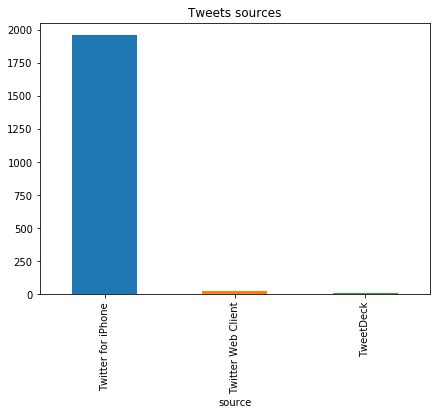

In [57]:
cleaned_merge_df['device_source'].value_counts().plot(kind = 'bar',title="Tweets sources", figsize=(7,5)).set_xlabel('source')

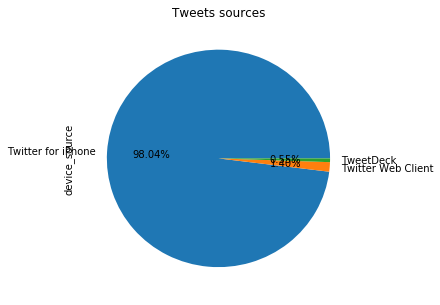

In [58]:
cleaned_merge_df['device_source'].value_counts().plot(kind = 'pie',title="Tweets sources", figsize=(5,5),autopct='%.2f%%')

In [59]:
cleaned_merge_df.groupby('tweet_date')['tweet_id'].count().sort_values(ascending=False)[0:10]

tweet_date
2015-11-29    26
2015-11-28    26
2015-11-16    25
2015-12-01    23
2015-11-19    23
2015-11-25    21
2015-11-22    20
2015-11-23    20
2015-12-07    20
2015-11-20    20
Name: tweet_id, dtype: int64

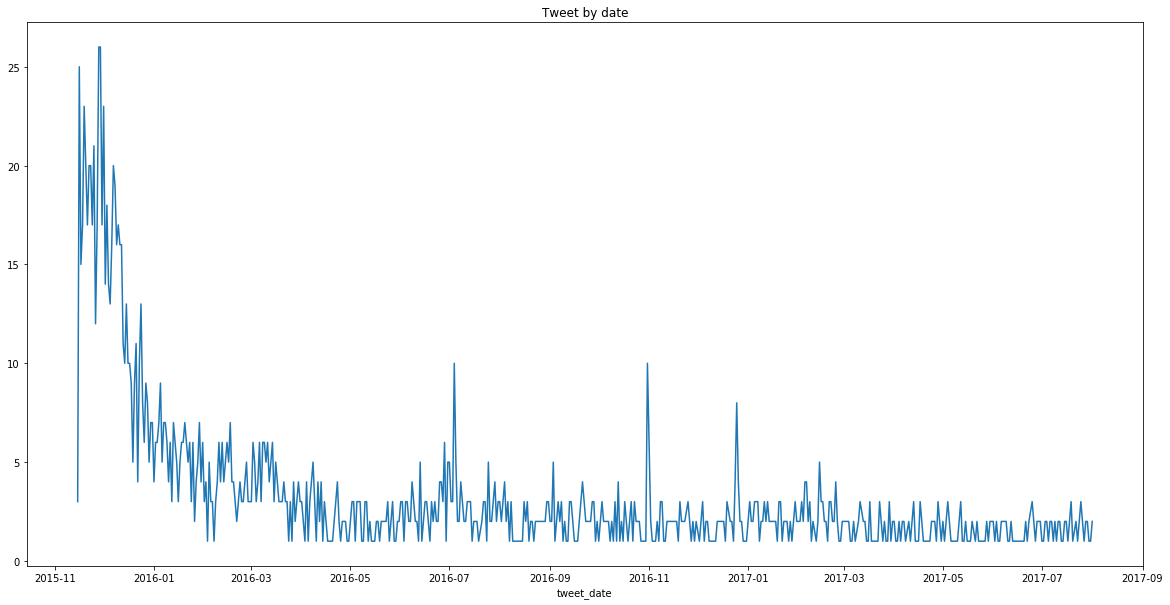

In [73]:
cleaned_merge_df.groupby('tweet_date')['tweet_id'].count().sort_values(ascending=False).plot(kind='line',title='Tweet by date', figsize=(20,10))

In [61]:
cleaned_merge_df.groupby('tweet_year')['tweet_id'].count()

tweet_year
2015    663
2016    974
2017    357
Name: tweet_id, dtype: int64

Text(0.5,0,'year')

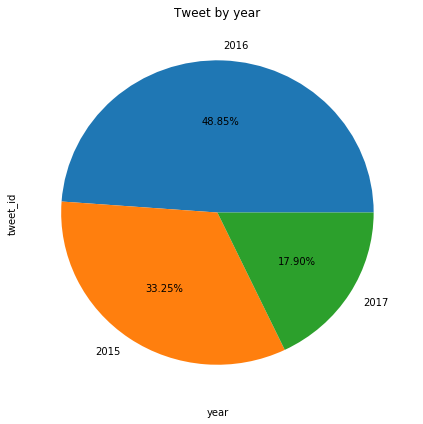

In [71]:
# visuals of tweet count per year
cleaned_merge_df.groupby('tweet_year')['tweet_id'].count().sort_values(ascending=False).plot(kind='pie',title='Tweet by year',figsize=(7,7),autopct='%.2f%%').set_xlabel('year')

In [63]:
# visuals of top five(5) most popular dog name
popular_dog_name=cleaned_merge_df.query('name!="None"')['name'].value_counts()[0:5]
popular_dog_name

Charlie    11
Lucy       10
Oliver     10
Cooper     10
Tucker      9
Name: name, dtype: int64

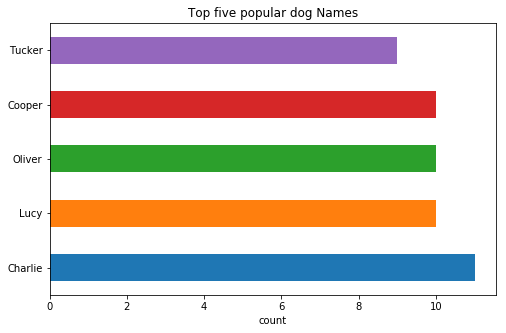

In [64]:
# visuals of top five(5) most popular dog name
popular_dog_name=cleaned_merge_df.query('name!="None"')['name'].value_counts()[0:5].plot(kind='barh',figsize=(8,5),title="Top five popular dog Names").set_xlabel('count')